In [1]:
import pandas as pdf
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

In [2]:
data = pdf.read_csv("./data/test.csv", index_col = 0)

In [3]:
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,,,,,,,,,
3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [4]:
data.shape

(228, 9)

In [5]:
data = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno','pat.karno', 'meal.cal', 'wt.loss']]
data["status"] = data["status"] - 1
data["sex"] = data["sex"] - 1
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
inst,,,,,,,,,
3.0,306,0,74,0,1.0,90.0,100.0,1175.0,NaN
3.0,455,0,68,0,0.0,90.0,90.0,1225.0,15.0
3.0,1010,-1,56,0,0.0,90.0,90.0,NaN,15.0
5.0,210,0,57,0,1.0,90.0,60.0,1150.0,11.0
1.0,883,0,60,0,0.0,100.0,90.0,NaN,0.0


In [6]:
data.dtypes

time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [7]:
data.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [8]:
data["ph.karno"].fillna(data["ph.karno"].mean(), inplace = True)
data["pat.karno"].fillna(data["pat.karno"].mean(), inplace = True)
data["meal.cal"].fillna(data["meal.cal"].mean(), inplace = True)
data["wt.loss"].fillna(data["wt.loss"].mean(), inplace = True)
data.dropna(inplace=True)
data["ph.ecog"] = data["ph.ecog"].astype("int64")

In [9]:
data.isnull().sum()

time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64

In [10]:
data.shape

(227, 9)

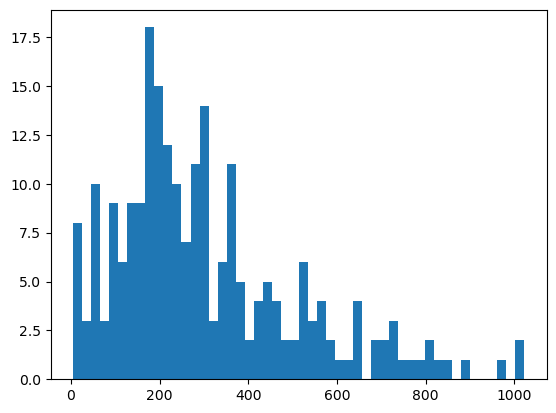

In [11]:
time = "time"
event = "status"
method = "sex"
T = data[time]
E = data[event]
M = data[method]
plt.hist(T, bins = 50)
plt.show()

<Axes: xlabel='timeline'>

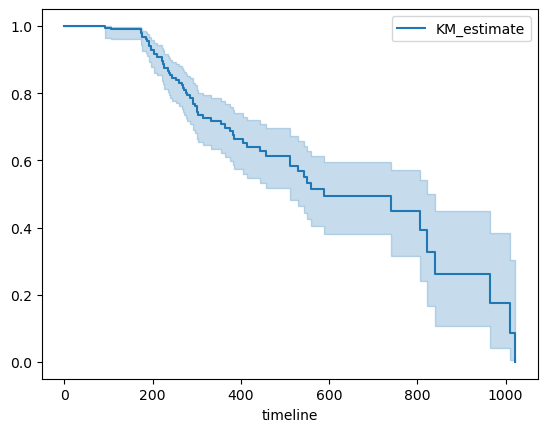

In [12]:
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

In [13]:
cph = CoxPHFitter()
columns = [time, event, method, 'age']
cph.fit(data[columns], duration_col = time, event_col = event)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 227 total observations, 164 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 227
number of events observed = 63
   partial log-likelihood = -259.06
         time fit was run = 2025-05-16 14:43:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
sex         0.62       1.86       0.26             0.10             1.14                 1.11                 3.13
age        -0.03       0.97       0.01            -0.05             0.00                 0.95                 1.00

            cmp to     z    p   -log2(p)
covariate                               
sex           0.00  2.35 0.02       5.75
age           0.00 -1.78 0.07       3.75
---
Concordance = 0.55
Partial AIC = 522.13
log-likelihood ratio test = 9.34 on 2 df
-log2(p) of ll-ratio test = 6.74

<Axes: xlabel='log(HR) (95% CI)'>

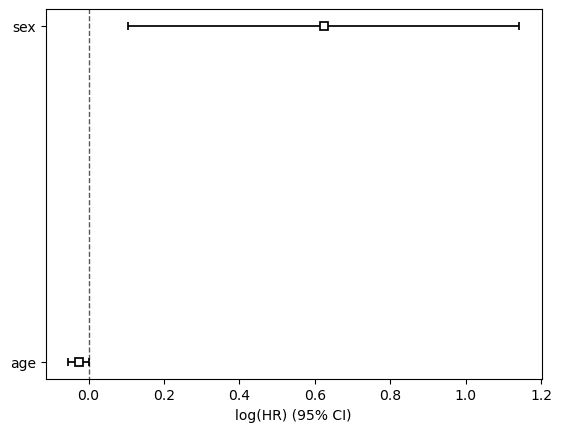

In [14]:
cph.plot()

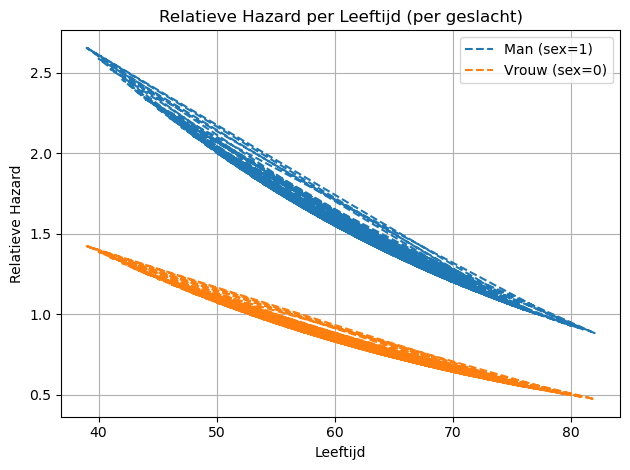

In [15]:
# Data voor sex = 1
X_plot_male = pdf.DataFrame({
    'sex': [1] * len(data['age']),
    'age': data['age']
})

X_plot_female = pdf.DataFrame({
    'sex': [0] * len(data['age']),
    'age': data['age']
})

# Zorg dat de index uniek is
X_plot_male.index = range(len(X_plot_male))
X_plot_female.index = range(len(X_plot_female))

# Bereken de relatieve hazards
hazard_ratios_male = cph.predict_partial_hazard(X_plot_male)
hazard_ratios_female = cph.predict_partial_hazard(X_plot_female)


# Voeg toe aan de grafiek
plt.plot(data['age'], hazard_ratios_male, linestyle='--', label='Man (sex=1)')
plt.plot(data['age'], hazard_ratios_female, linestyle='--', label='Vrouw (sex=0)')
plt.title('Relatieve Hazard per Leeftijd (per geslacht)')
plt.xlabel('Leeftijd')
plt.ylabel('Relatieve Hazard')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
